In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def plot_series(time, series, format='-', start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)
    

Trend and seasonality

In [4]:
def trend(time, slope=0):
    return slope * time


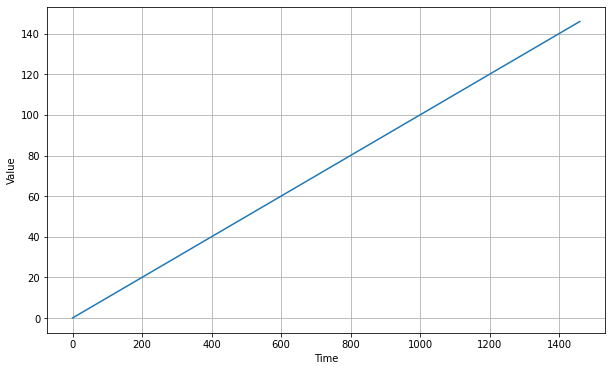

In [6]:
time = np.arange(4*365+1)
baseline = 10
series = trend(time, 0.1)
plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

In [7]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi),
                   1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)


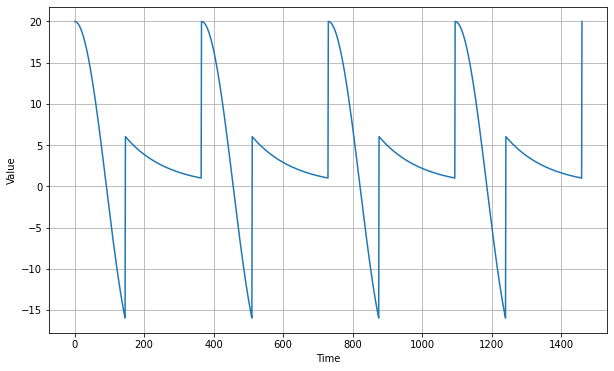

In [12]:
baseline = 5
amplitude = 20
series = seasonality(time, period = 365, amplitude = amplitude)
plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

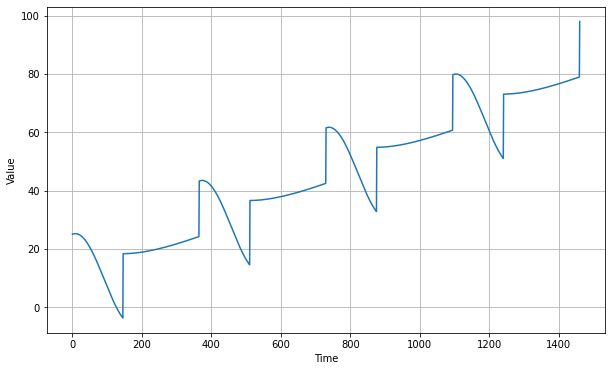

In [14]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365,
                            amplitude = amplitude)
plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()


Noise

In [15]:
def white_noise(time, noise_level = 1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

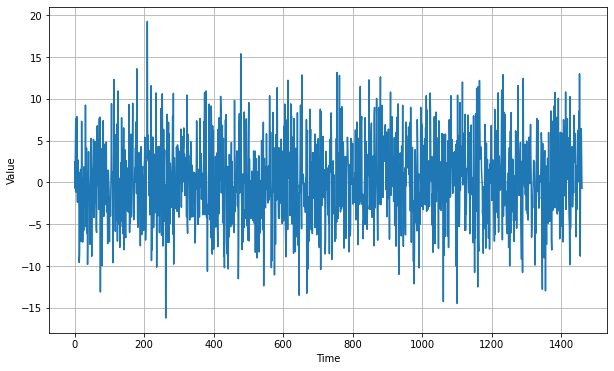

In [16]:
noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10,6))
plot_series(time, noise)
plt.show()

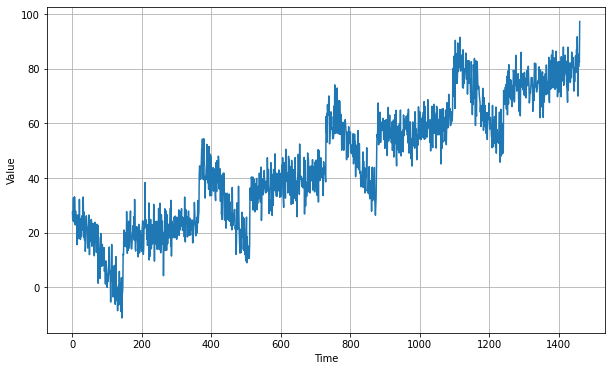

In [17]:
series = series + noise
plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

In [18]:
def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    phi = 0.8
    ar = rnd.randn(len(time)+1)
    for step in range(1, len(time)+1):
        ar[step] += phi * ar[step-1]
    return ar[1:] * amplitude

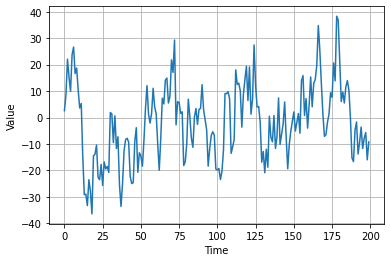

In [19]:
series = autocorrelation(time, 10, seed=42)
plot_series(time[:200], series[:200])
plt.show()

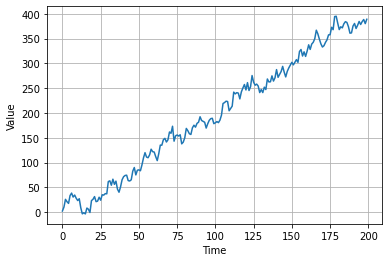

In [20]:
series = autocorrelation(time, 10, seed=42) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

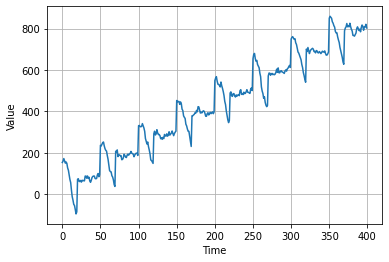

In [22]:
series = autocorrelation(time, 10, seed=42) + \
        seasonality(time, period=50, amplitude=150) +\
        trend(time, 2)
plot_series(time[:400], series[:400])
plt.show()

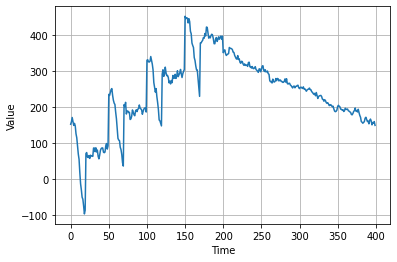

In [25]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]

plot_series(time[0:400], series[0:400])